<a href="https://colab.research.google.com/github/erikasrn/Machine_Learning/blob/main/CentralJava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn hdbscan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import hdbscan
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import random

In [ ]:
df = pd.read_csv('/content/CentralJava.csv')
df.head()

,keyword,Title,Reviews,Review_points,Address,Country,City,State,Website,Phone,...,Open_Time_Friday,Open_Time_Saturday,Open_Time_Sunday,Popular_times_Monday,Popular_times_Tuesday,Popular_times_Wednesday,Popular_times_Thursday,Popular_times_Friday,Popular_times_Saturday,Popular_times_Sunday
0,Tempat wisata di Jawa Tengah,Wisata Lereng Kelir,375,4.4,"M9PF+WVM, Jl. Ke Dusun Gertas, Gertas, Brongko...",ID,Semarang Regency,Central Java,http://www.wisatalerengkelir.com/,+62 856-4145-0823,...,Friday Open 24 hours 2024-11-29,Saturday Open 24 hours 2024-11-30,Sunday Open 24 hours 2024-12-01,14% busy at 4 AM;10% busy at 5 AM;10% busy at ...,44% busy at 4 AM;40% busy at 5 AM;48% busy at ...,53% busy at 4 AM;48% busy at 5 AM;46% busy at ...,28% busy at 4 AM;44% busy at 5 AM;22% busy at ...,46% busy at 4 AM;57% busy at 5 AM;34% busy at ...,24% busy at 4 AM;20% busy at 5 AM;30% busy at ...,44% busy at 4 AM;38% busy at 5 AM;55% busy at ...
1,Tempat wisata di Jawa Tengah,Taman Wisata Kopeng,8856,4.2,"Jl. Magelang - Salatiga No.KM. 15, Dukuh, Kope...",ID,Semarang Regency,Central Java,NaN,+62 298 318344,...,Friday 7 AM–6 PM 2024-11-29,Saturday 7 AM–6 PM 2024-11-30,Sunday 7 AM–6 PM 2024-12-01,0% busy at 6 AM;10% busy at 7 AM;14% busy at 8...,0% busy at 6 AM;8% busy at 7 AM;11% busy at 8 ...,0% busy at 6 AM;6% busy at 7 AM;10% busy at 8 ...,0% busy at 6 AM;10% busy at 7 AM;14% busy at 8...,0% busy at 6 AM;9% busy at 7 AM;12% busy at 8 ...,0% busy at 6 AM;14% busy at 7 AM;22% busy at 8...,0% busy at 6 AM;25% busy at 7 AM;40% busy at 8...
2,Tempat wisata di Jawa Tengah,Umbul Sidomukti,7569,4.6,"Umbul Sidomukti, Manggung, Jimbaran, Bandungan...",ID,Semarang Regency,Central Java,http://www.umbulsidomukti.com/,+62 298 7137009,...,Friday 8 AM–6 PM 2024-11-29,Saturday 8 AM–6 PM 2024-11-30,Sunday 8 AM–6 PM 2024-12-01,0% busy at 6 AM;0% busy at 7 AM;10% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;7% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;7% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;11% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;7% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;20% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;40% busy at 8 ...
3,Tempat wisata di Jawa Tengah,Wisata Alam Wana Wisata Penggaron,885,4.1,"VCMC+MPM, Siroto, Susukan, Kec. Ungaran Tim., ...",ID,Semarang Regency,Central Java,NaN,NaN,...,Friday 8 AM–6 PM 2024-11-29,Saturday 8 AM–6 PM 2024-11-30,Sunday 8 AM–6 PM 2024-12-01,0% busy at 6 AM;0% busy at 7 AM;62% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;52% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;51% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;73% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;56% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;62% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;76% busy at 8 ...
4,Tempat wisata di Jawa Tengah,Umbul Ponggok,21689,4.5,"Jl. Delanggu- Polanharjo No.Ds, Jeblogan, Pong...",ID,Klaten Regency,Central Java,NaN,+62 858-7887-0003,...,Friday 8 AM–4 PM 2024-11-29,Saturday 7 AM–5 PM 2024-11-30,Sunday 7 AM–5 PM 2024-12-01,0% busy at 6 AM;0% busy at 7 AM;23% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;21% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;20% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;20% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;24% busy at 8 ...,0% busy at 6 AM;29% busy at 7 AM;41% busy at 8...,0% busy at 6 AM;41% busy at 7 AM;55% busy at 8...


In [ ]:
#Mengambil Variabel Yang akan Digunakan
df_centraljava = df.dropna(subset=['Reviews', 'City', 'Latitude', 'Longitude'])
df_centraljava = df[df['State'] == "Bali"]

df_centraljava = df[['Title', 'Reviews', 'Review_points', 'Latitude', 'Longitude']]

df_centraljava.head()

,Title,Reviews,Review_points,Latitude,Longitude
0,Wisata Lereng Kelir,375,4.4,-7.312661,110.374679
1,Taman Wisata Kopeng,8856,4.2,-7.398416,110.419317
2,Umbul Sidomukti,7569,4.6,-7.194590,110.373358
3,Wisata Alam Wana Wisata Penggaron,885,4.1,-7.115797,110.421797
4,Umbul Ponggok,21689,4.5,-7.613810,110.635865


In [ ]:
df_centraljava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          179 non-null    object 
 1   Reviews        179 non-null    int64  
 2   Review_points  179 non-null    float64
 3   Latitude       179 non-null    float64
 4   Longitude      179 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
df_centraljava.isnull().sum()

,0
Title,0
Reviews,0
Review_points,0
Latitude,0
Longitude,0


In [ ]:
df_centraljava.duplicated().sum()

0

# Train The Model

In [ ]:
coords = df[['Latitude', 'Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [ ]:
coords_rad = np.radians(coords)

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=1, cluster_selection_epsilon=0.0001)
cluster_labels = clusterer.fit_predict(coords_rad)

df['Cluster'] = cluster_labels

In [ ]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = (cluster_labels == -1).sum()

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Points per cluster
print(df['Cluster'].value_counts())

Number of clusters: 31
Number of noise points: 29
Cluster
-1     29
 19    14
 14    10
 26     9
 12     8
 0      8
 17     7
 30     6
 13     6
 18     5
 21     5
 5      5
 9      4
 15     4
 25     4
 8      4
 3      4
 2      4
 1      4
 28     3
 6      3
 29     3
 16     3
 11     3
 10     3
 20     3
 7      3
 4      3
 27     3
 24     3
 22     3
 23     3
Name: count, dtype: int64


In [ ]:
# Assign noise points to individual clusters
noise_indices = df[df['Cluster'] == -1].index
new_cluster_labels = list(range(n_clusters, n_clusters + n_noise))
df.loc[noise_indices, 'Cluster'] = new_cluster_labels


n_clusters_new = len(set(df['Cluster']))
n_noise_new = (df['Cluster'] == -1).sum()

print(f"New Number of clusters: {n_clusters_new}")
print(f"New Number of noise points: {n_noise_new}")

# Points per cluster
print(df['Cluster'].value_counts())

New Number of clusters: 60
New Number of noise points: 0
Cluster
19    14
14    10
26     9
12     8
0      8
17     7
30     6
13     6
18     5
5      5
21     5
15     4
25     4
9      4
3      4
2      4
1      4
8      4
22     3
16     3
24     3
29     3
28     3
7      3
23     3
10     3
6      3
20     3
4      3
27     3
11     3
50     1
49     1
55     1
51     1
52     1
53     1
54     1
47     1
56     1
57     1
58     1
48     1
31     1
46     1
45     1
44     1
43     1
42     1
41     1
40     1
39     1
38     1
37     1
36     1
35     1
34     1
33     1
32     1
59     1
Name: count, dtype: int64


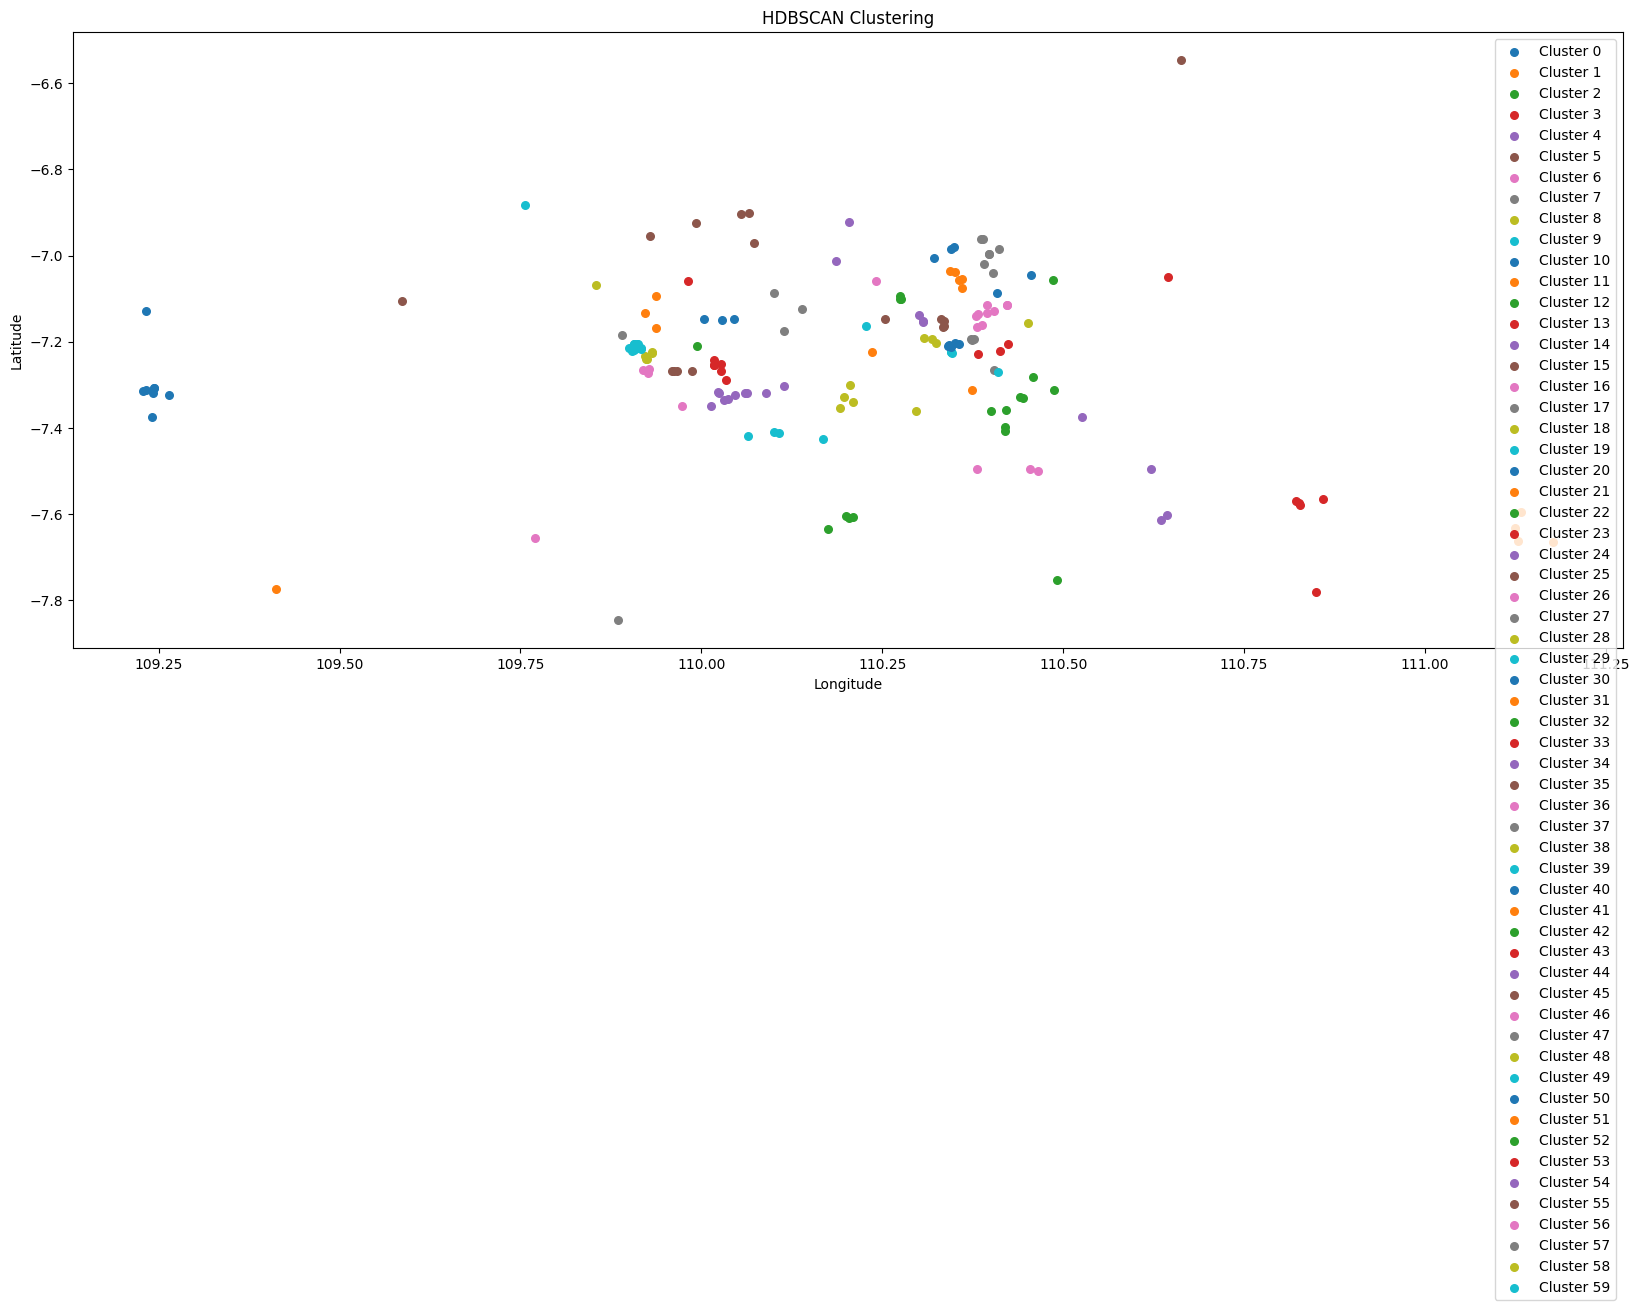

In [ ]:
plt.figure(figsize=(20, 8))
for cluster_id in sorted(df['Cluster'].unique()):
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise"
    cluster_points = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_points['Longitude'], cluster_points['Latitude'], label=label, s=30)

plt.title("HDBSCAN Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [ ]:
clusters = {}
for cluster_id in sorted(df['Cluster'].unique()):
    if cluster_id == -1:
        continue
    clusters[f"Cluster {cluster_id + 1}"] = df[df['Cluster'] == cluster_id][['Title', 'Latitude', 'Longitude']]

for day, locations in clusters.items():
    print(f"\n{day} ({len(locations)} locations):")
    print(locations)


Cluster 1 (8 locations):
                                             Title  Latitude   Longitude
43   Obyek Wisata CURUG SIBEDIL Sima Moga Pemalang -7.127940  109.232561
49                                      Baturraden -7.313391  109.229080
76                          Curug Telu, Purwokerto -7.319907  109.241942
81                         Telaga Sunyi Purwokerto -7.307240  109.243196
97                     Baturraden Botanical Garden -7.312932  109.232332
116                         The Village Purwokerto -7.374460  109.240532
128                         Hutan Pinus Limpakuwus -7.307382  109.243612
149                        Curug Ceheng Purwokerto -7.323561  109.264091

Cluster 2 (4 locations):
                        Title  Latitude   Longitude
9    Air Terjun Grojogan Sewu -7.661533  111.128640
13            Jumog Waterfall -7.631105  111.124533
140             The Lawu Park -7.663738  111.176373
155        Kebun Teh Kemuning -7.595523  111.133367

Cluster 3 (4 locations):
     

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate evaluation metrics
silhouette_avg = silhouette_score(coords_rad, df['Cluster'])
davies_bouldin = davies_bouldin_score(coords_rad, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(coords_rad, df['Cluster'])


# Create a DataFrame for the evaluation matrix
evaluation_matrix = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'],
    'Score': [silhouette_avg, davies_bouldin, calinski_harabasz]
})

evaluation_matrix

# Interpretasi hasil
# Silhouette Score:  Semakin mendekati 1, semakin baik clustering. Nilai negatif menunjukkan kemungkinan salah clustering.
# Davies-Bouldin Index:  Semakin rendah nilainya, semakin baik clustering.
# Calinski-Harabasz Index:  Semakin tinggi nilainya, semakin baik clustering.

,Metric,Score
0,Silhouette Score,0.449368
1,Davies-Bouldin Index,0.372006
2,Calinski-Harabasz Index,403.517567
